In [8]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud
df = pd.read_csv("Sentiment dataset.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Sentiment dataset.csv'

In [ ]:
!pip install textblob


In [1]:
from textblob import TextBlob


In [ ]:
!pip install wordcloud


In [ ]:
!pip install wordcloud


In [3]:
import sys
!{sys.executable} -m pip install textblob wordcloud


In [5]:
from textblob import TextBlob
from wordcloud import WordCloud

print("All libraries imported successfully!")

All libraries imported successfully!


In [10]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud
df = pd.read_csv("3) Sentiment dataset.csv")
df.head()

Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature #Park                                  15.0   30.0     USA         
1   #Traffic #Morning                               5.0   10.0     Canada      
2   #Fitness #Workout                              20.0   40.0   USA           
3   #Travel #Adventure                              8.0   15.0     UK          
4   #Cooking #Food                                 12.0   25.0    Australia    

   Year  Month  Day  Hour  
0  2023      1   15    12  
1  2023      1   15     8  
2  2023      1   15    15  
3  2023      1   15    18  
4  2023      1   15    19

In [17]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
df.columns


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [20]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [w for w in tokens if w.isalpha()]
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens)

df['clean_text'] = df['Text'].apply(preprocess_text)

In [23]:
def analyze_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Predicted_Sentiment'] = df['clean_text'].apply(analyze_sentiment)


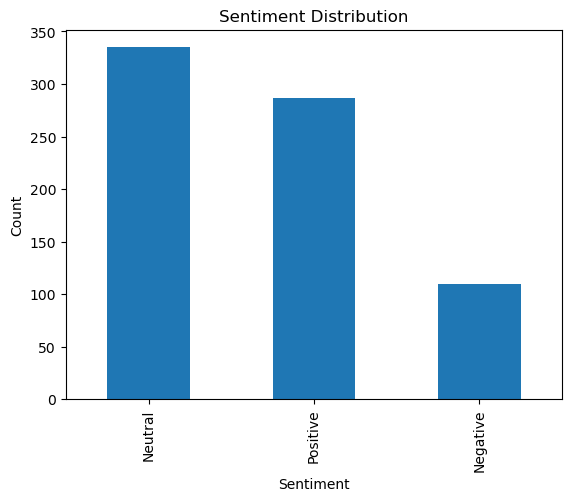

In [24]:
df['Predicted_Sentiment'].value_counts().plot(kind='bar')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()


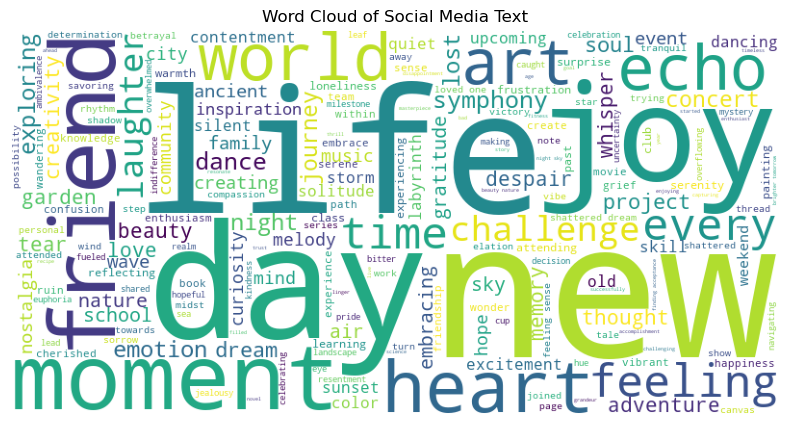

In [25]:
all_text = " ".join(df['clean_text'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of Social Media Text")
plt.show()


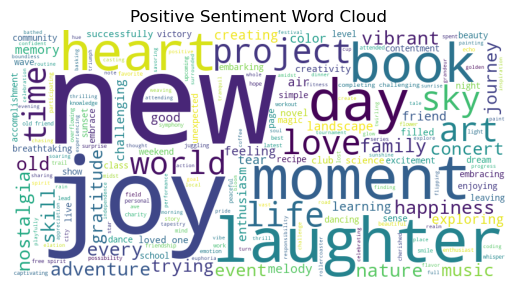

In [26]:
positive_text = " ".join(
    df[df['Predicted_Sentiment'] == 'Positive']['clean_text']
)

wc_positive = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(positive_text)

plt.imshow(wc_positive)
plt.axis('off')
plt.title("Positive Sentiment Word Cloud")
plt.show()
